1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH

1.1 Biến đổi cường độ ảnh (Image inverse transformation)


[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


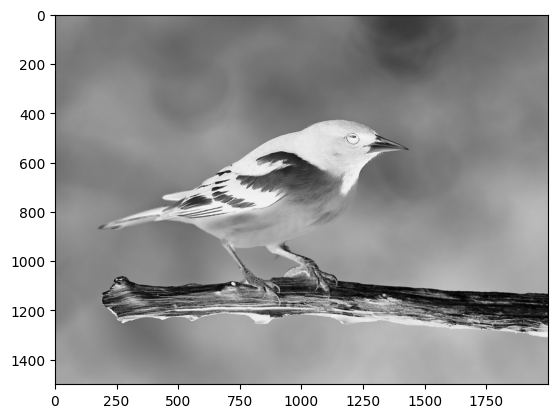

In [9]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image i into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1
print (im_2)

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img, cmap = "gray")
plt.show()


1.2 Thay đổi chất lượng với Power law (Gamma - Correction)

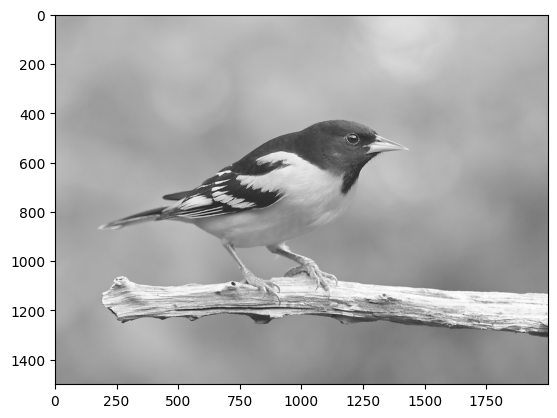

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)
# Gamma ban đầu
gamma = 0.5
# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# Chuẩn hóa B1 (tức là chuyển các giá trị b1 về khoảng [0,1])
b3 = (b1+1) / b2
# Tính tương quan hàm mũ gamma (logarit nhân gamma)
b4 = np.log(b3) * gamma
# Tính tương quan hàm mũ gamma và quy về khoảng [0,255]
c = np.exp(b4) * 255.0
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
plt.imshow(d, cmap='gray')
plt.show()

1.3 Thay đổi cường độ điểm ảnh với Log Transformation

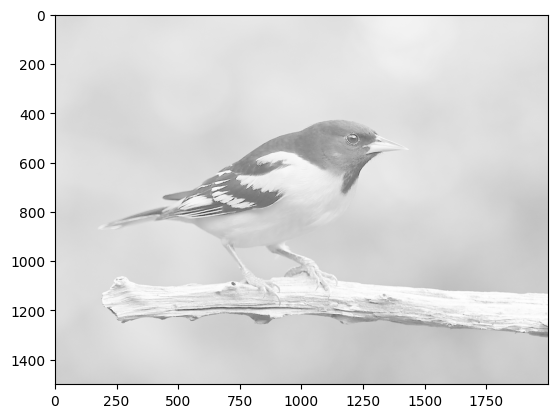

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)

# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# Biến đổi log
c = (128.0*np.log(1+b1))/np.log(1+b2)
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
plt.imshow(d, cmap='gray')
plt.show()

1.4 Histogram equalization 

<function matplotlib.pyplot.show(close=None, block=None)>

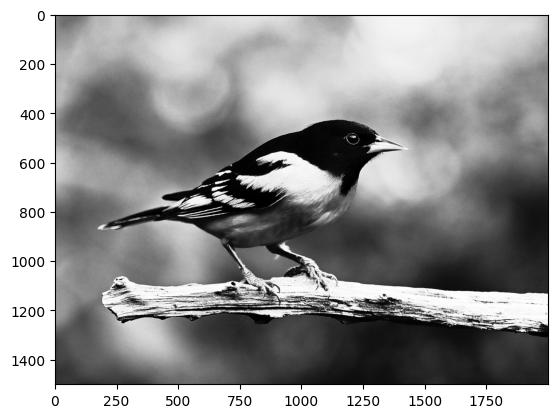

In [13]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im1 = np.array(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
plt.imshow(im4, cmap = 'gray')
plt.show

1.5 Thay đổi với Contrast Stretching

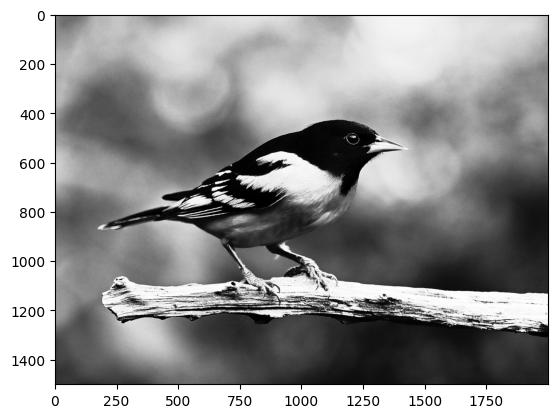

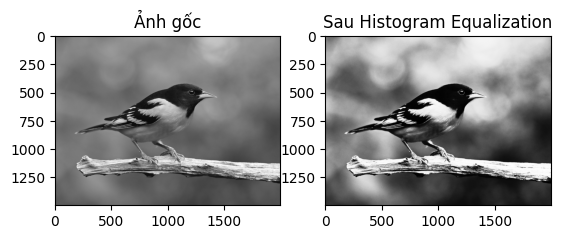

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh mức xám
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im1 = np.array(img)

# Làm phẳng mảng (1 chiều hóa)
b1 = im1.flatten()

# Tính histogram với 256 mức xám
hist, bins = np.histogram(im1, 256, [0, 255])

# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()

# Bỏ qua các phần tử bằng 0 để tránh chia cho 0
cdf_m = np.ma.masked_equal(cdf, 0)

# Áp dụng công thức chuẩn hóa CDF để đưa về 0–255
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf.min())
cdf_m = num_cdf_m / den_cdf_m

# Gán lại giá trị CDF đã chuẩn hóa
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Tra bảng tra CDF để ánh xạ giá trị pixel mới
im2 = cdf[b1]

# Đưa ảnh trở lại định dạng 2D gốc
im3 = np.reshape(im2, im1.shape)

# Tạo ảnh mới từ mảng đã xử lý
im4 = Image.fromarray(im3)

# Hiển thị ảnh sau Histogram Equalization
plt.imshow(im4, cmap='gray')
plt.show()

# So sánh thử 

plt.subplot(1, 2, 1)
plt.title("Ảnh gốc")
plt.imshow(im1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Sau Histogram Equalization")
plt.imshow(im3, cmap='gray')


1.6.1 Biến đổi ảnh với Fast Fourier

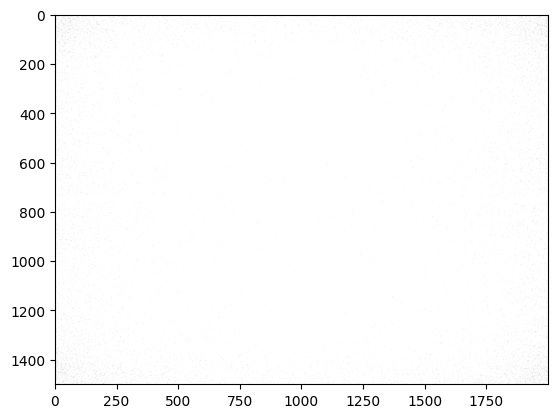

In [17]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2 Lọc ảnh miền tần suất 

Butterworth Lowpass Filter

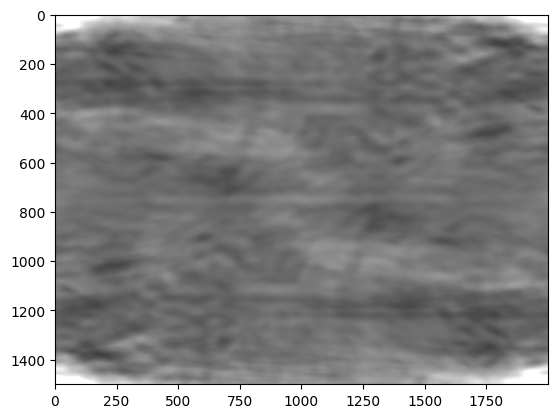

In [23]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

#performing FFT
c = abs(scipy.fftpack.fft2(im1))

#shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))

center1 = M/2
center2 = N/2
d_0 = 30.0  # cut-off radius
t1 = 1     # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
#defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
        r = math.sqrt(r1)
        #using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i,j] = 1 / (1 + (r/d_0)**(2*t1))

#H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

#performing the convolution
con = d * H

#computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()



Butterworth Highpass Filter

C:\Users\X270\AppData\Local\Temp\ipykernel_9300\2937638357.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  e = e.astype(float)


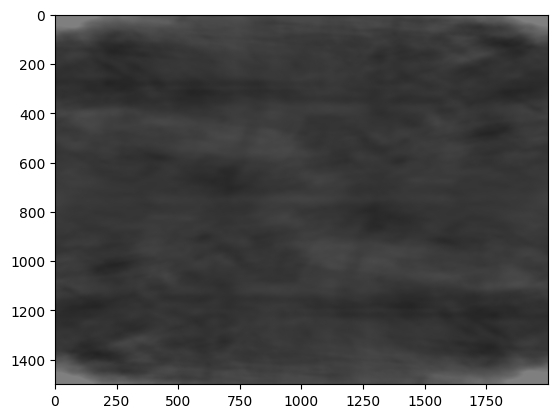

In [19]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

#H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d0 = 30.0  # cut-off radius
t1 = 1     # the order of BLPF (Butterworth Lowpass Filter)

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)           # euclidean distance from origin is computed
        if r > 0:                   # using cut-off radius to eliminate high frequency
            H[i,j] = 1 / (1 + (r/d0)**(2*t1))

#H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

# performing the convolution
com = d * H

# computing the magnitude of the inverse FFT
e = scipy.fftpack.ifft2(com)

#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
h.show()
plt.imshow(im3)
plt.show()


2.BÀI TẬP


1.

Chọn phương pháp biến đổi:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


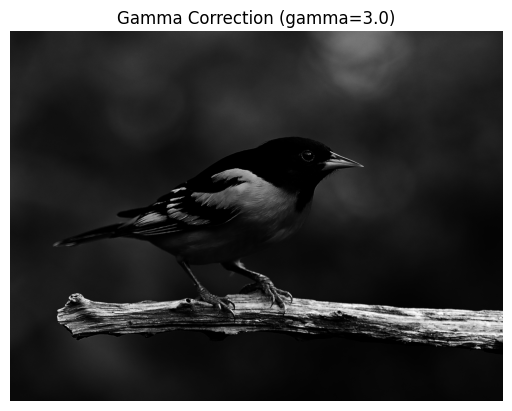

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image_array):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Hàm 1: Image inverse
def image_inverse(im):
    return 255 - im

# Hàm 2: Gamma correction
def gamma_correction(im, gamma=0.5):
    norm = im / 255.0
    corrected = np.power(norm, gamma)
    return np.uint8(corrected * 255)

# Hàm 3: Log transformation
def log_transform(im):
    im = im.astype(float)
    c = 255 / np.log(1 + np.max(im))
    log_image = c * np.log(1 + im)
    return np.uint8(log_image)

# Hàm 4: Histogram equalization
def histogram_equalization(im):
    flat = im.flatten()
    hist, bins = np.histogram(im, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized = cdf[flat]
    return np.reshape(equalized, im.shape)

# Hàm 5: Contrast stretching
def contrast_stretch(im):
    a, b = np.min(im), np.max(im)
    stretched = 255 * (im - a) / (b - a)
    return np.uint8(stretched)

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')
im_array = np.array(img)

# Menu
print("Chọn phương pháp biến đổi:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

choice = input("Nhập lựa chọn của bạn (I/G/L/H/C): ").upper()

if choice == 'I':
    result = image_inverse(im_array)
    show_image("Image Inverse", result)

elif choice == 'G':
    gamma = float(input("Nhập giá trị gamma (ví dụ: 0.5 hoặc 5): "))
    result = gamma_correction(im_array, gamma)
    show_image(f"Gamma Correction (gamma={gamma})", result)

elif choice == 'L':
    result = log_transform(im_array)
    show_image("Log Transformation", result)

elif choice == 'H':
    result = histogram_equalization(im_array)
    show_image("Histogram Equalization", result)

elif choice == 'C':
    result = contrast_stretch(im_array)
    show_image("Contrast Stretching", result)

else:
    print("Lựa chọn không hợp lệ!")
#Của chat GPT



2.

Chọn phương pháp biến đổi:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


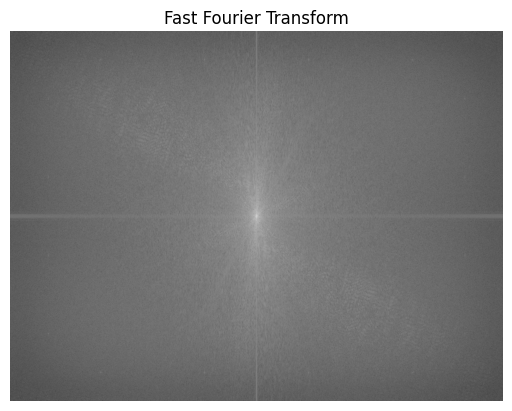

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math

def show_image(title, image_array):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. FFT hiển thị phổ tần số
def fast_fourier(im):
    f = np.fft.fft2(im)
    fshift = np.fft.fftshift(f)
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude / magnitude.max() * 255)

# 2. Butterworth Lowpass Filter
def butterworth_lowpass(im, D0=30, n=1):
    M, N = im.shape
    u = np.arange(M) - M//2
    v = np.arange(N) - N//2
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0)**(2*n))
    
    F = np.fft.fft2(im)
    F_shifted = np.fft.fftshift(F)
    G = H * F_shifted
    G = np.fft.ifftshift(G)
    im_back = np.fft.ifft2(G)
    return np.abs(im_back).astype(np.uint8)

# 3. Butterworth Highpass Filter
def butterworth_highpass(im, D0=30, n=1):
    M, N = im.shape
    u = np.arange(M) - M//2
    v = np.arange(N) - N//2
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D0 / (D + 1e-5))**(2*n))  # Tránh chia cho 0
    
    F = np.fft.fft2(im)
    F_shifted = np.fft.fftshift(F)
    G = H * F_shifted
    G = np.fft.ifftshift(G)
    im_back = np.fft.ifft2(G)
    return np.abs(im_back).astype(np.uint8)


# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')
im_array = np.array(img)

# Menu lựa chọn
print("Chọn phương pháp biến đổi:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

choice = input("Nhập lựa chọn của bạn (F/L/H): ").upper()

if choice == 'F':
    result = fast_fourier(im_array)
    show_image("Fast Fourier Transform", result)

elif choice == 'L':
    result = butterworth_lowpass(im_array, D0=30, n=2)
    show_image("Butterworth Lowpass Filter", result)

elif choice == 'H':
    result = butterworth_highpass(im_array, D0=30, n=2)
    show_image("Butterworth Highpass Filter", result)

else:
    print("Lựa chọn không hợp lệ!")


3.

4.